In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
dadosRU = pd.read_excel('base.xlsx', index_col=0)

In [3]:
df = dadosRU.set_index(pd.to_datetime(dadosRU.Data))
df.drop(columns=['Data'], inplace=True)

In [4]:
df.head()

,Qt_almoco,Qt_jantar
Data,,
2016-01-04,364,294
2016-01-05,489,363
2016-01-06,522,401
2016-01-07,514,349
2016-01-08,409,218


In [5]:
df.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-30', '2020-03-31'],
              dtype='datetime64[ns]', name='Data', length=1097, freq=None)

# Anlisando visualmente e utilizando apenas a quantidade almoço para predizer os modelos lineares

## Método de adicionar uma coluna Time

In [6]:
df['Time'] = np.arange(len(df.index))

In [7]:
df.tail()

,Qt_almoco,Qt_jantar,Time
Data,,,
2020-03-25,0,0,1092
2020-03-26,11,13,1093
2020-03-27,15,14,1094
2020-03-30,13,12,1095
2020-03-31,14,9,1096


### Liner Regression

In [8]:
# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Qt_almoco']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
# Store the fitted values as a time series with the same time index as
# the training data
y_pred1_1 = pd.Series(model.predict(X), index=X.index)

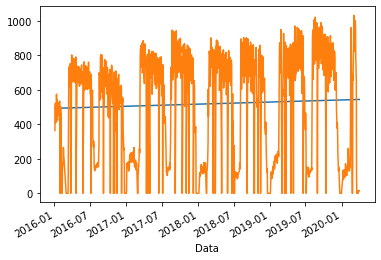

In [10]:
y_pred1_1.plot()
df['Qt_almoco'].plot();

### Random Forest

In [11]:
# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Qt_almoco']  # target

# Train the model
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [12]:
# Store the fitted values as a time series with the same time index as
# the training data
y_pred1_2 = pd.Series(model.predict(X), index=X.index)

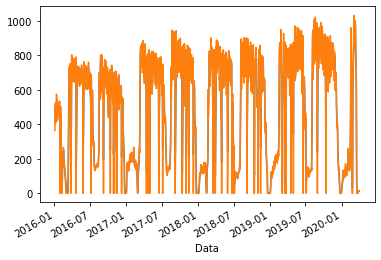

In [13]:
y_pred1_2.plot()
df['Qt_almoco'].plot();

Obs: Valores de predição usando toda a base de dados. 

## Método de adicionar uma coluna Time

In [14]:
df1 = df.copy()
df1['Lag_1'] = df['Qt_almoco'].shift(1)
df1.head()

,Qt_almoco,Qt_jantar,Time,Lag_1
Data,,,,
2016-01-04,364,294,0,NaN
2016-01-05,489,363,1,364.0
2016-01-06,522,401,2,489.0
2016-01-07,514,349,3,522.0
2016-01-08,409,218,4,514.0


### Linear Regression

In [15]:
X = df1.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'Qt_almoco']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred2_1 = pd.Series(model.predict(X), index=X.index)

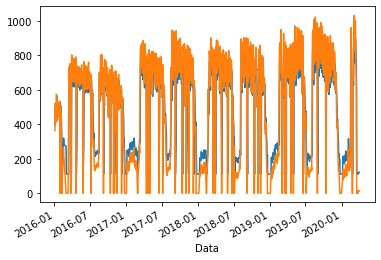

In [16]:
y_pred2_1.plot()
df1['Qt_almoco'].plot();

### Random Forest

In [17]:
X = df1.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'Qt_almoco']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = RandomForestRegressor()
model.fit(X, y)

y_pred2_2 = pd.Series(model.predict(X), index=X.index)

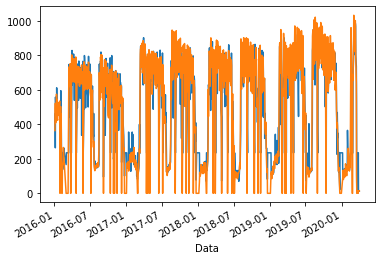

In [18]:
y_pred2_2.plot()
df1['Qt_almoco'].plot();

# Avaliando os modelos com melhor desepenho observados acima por meio do Erro Quadrático Médio. Porém utizando tanto o almoço quando janta.

In [19]:
# Anos de ocorrência
np.unique(df.index.year)

array([2016, 2017, 2018, 2019, 2020], dtype=int64)

### Quantidade de dias contidos no dataset para os anos de 2019 e 2020.

Quantidade de observações de 2019: 260


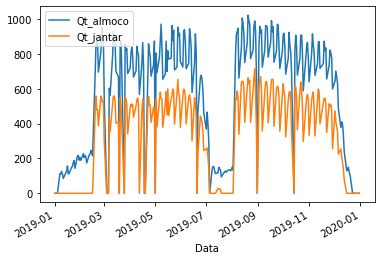

In [20]:
df3 = df['2019-01-01' :'2019-12-31']
print('Quantidade de observações de 2019:', df3.shape[0])
df3.drop(columns=['Time']).plot();

Quantidade de observações de 2020: 62


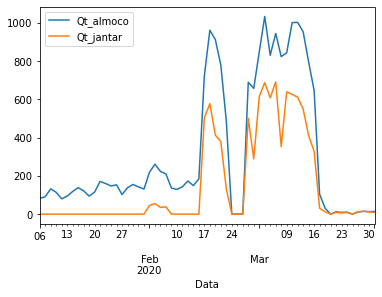

In [21]:
df4 = df['2020-01-01' :'2020-12-31']
print('Quantidade de observações de 2020:', df4.shape[0])
df4.drop(columns=['Time']).plot();

In [22]:
# Primeiro dia
df1.iloc[0]

Qt_almoco    364.0
Qt_jantar    294.0
Time           0.0
Lag_1          NaN
Name: 2016-01-04 00:00:00, dtype: float64

In [23]:
# Segundo dia
df1.iloc[1096]

Qt_almoco      14.0
Qt_jantar       9.0
Time         1096.0
Lag_1          13.0
Name: 2020-03-31 00:00:00, dtype: float64

In [24]:
df5 = pd.DataFrame({'Data':pd.date_range(start='2016-01-04', end='2020-03-31')})

In [25]:
df5

,Data
0,2016-01-04
1,2016-01-05
2,2016-01-06
3,2016-01-07
4,2016-01-08
...,...
1544,2020-03-27
1545,2020-03-28
1546,2020-03-29
1547,2020-03-30


In [26]:
df5 = df5.set_index('Data').join(df1,how='left').drop(columns=['Lag_1'])

In [27]:
df5['Time'] = np.arange(len(df5.index))

In [28]:
df5.sample(6)

,Qt_almoco,Qt_jantar,Time
Data,,,
2016-02-29,NaN,NaN,56
2016-02-17,250.0,123.0,44
2016-04-19,791.0,504.0,106
2019-10-19,NaN,NaN,1384
2016-02-23,NaN,NaN,50
2019-08-06,912.0,539.0,1310


In [29]:
df5['Qt_almoco'] = df5['Qt_almoco'].replace(np.nan, 0)
df5['Qt_jantar'] = df5['Qt_jantar'].replace(np.nan, 0)
df5.sample(6)

,Qt_almoco,Qt_jantar,Time
Data,,,
2016-03-28,630.0,487.0,84
2019-01-31,206.0,0.0,1123
2016-08-30,802.0,527.0,239
2016-11-22,679.0,489.0,323
2018-02-18,0.0,0.0,776
2019-10-02,919.0,581.0,1367


In [30]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1549 entries, 2016-01-04 to 2020-03-31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Qt_almoco  1549 non-null   float64
 1   Qt_jantar  1549 non-null   float64
 2   Time       1549 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 74.6 KB


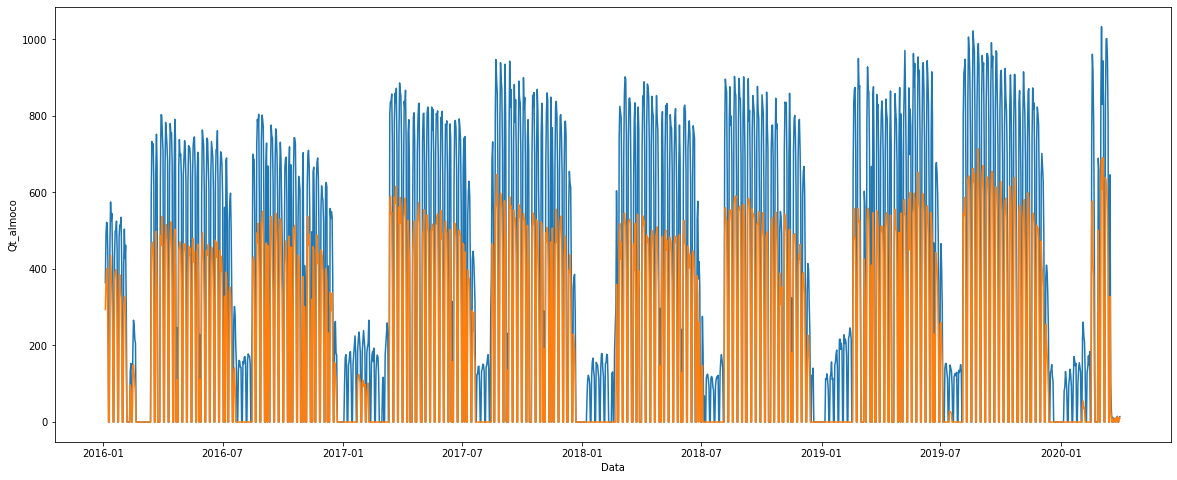

In [31]:
plt.figure(figsize=(20, 8))
sns.lineplot(x = df5.index, y = "Qt_almoco", data = df5);
sns.lineplot(x = df5.index, y = "Qt_jantar", data = df5);

Pelo fato de 2020 ter sido um ano atípico irei utlizar o ano de 2020 para avalizar os modelos

In [32]:
dfTreino = df5[:'2018-12-31']

In [33]:
dfTeste = df5['2019-01-01':'2019-12-31']

### Abordagem Time

### Random Forest

In [34]:
# Training data
Xtrain = dfTreino.loc[:, ['Time']]  # features
ytrain = dfTreino.loc[:, 'Qt_almoco']  # target

# Train the model
model = RandomForestRegressor()
model.fit(Xtrain, ytrain)

RandomForestRegressor()

In [35]:
# Store the fitted values as a time series with the same time index as
# the training data
y_pred_RanFor_Time = pd.Series(model.predict(Xtrain), index=Xtrain.index)

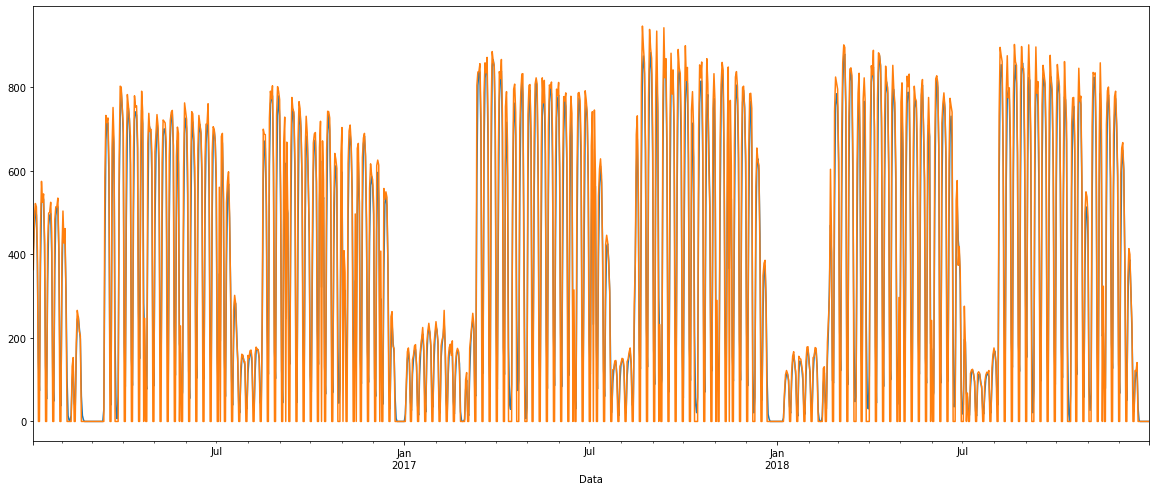

In [36]:
# Dados de treino
plt.figure(figsize=(20, 8))
y_pred_RanFor_Time.plot();
ytrain.plot();

In [37]:
# Test data
Xtest = dfTeste.loc[:, ['Time']]  # features
ytest_time = dfTeste.loc[:, 'Qt_almoco']  # target

In [38]:
y_pred_RanFor_Time = pd.Series(model.predict(Xtest), index=Xtest.index)

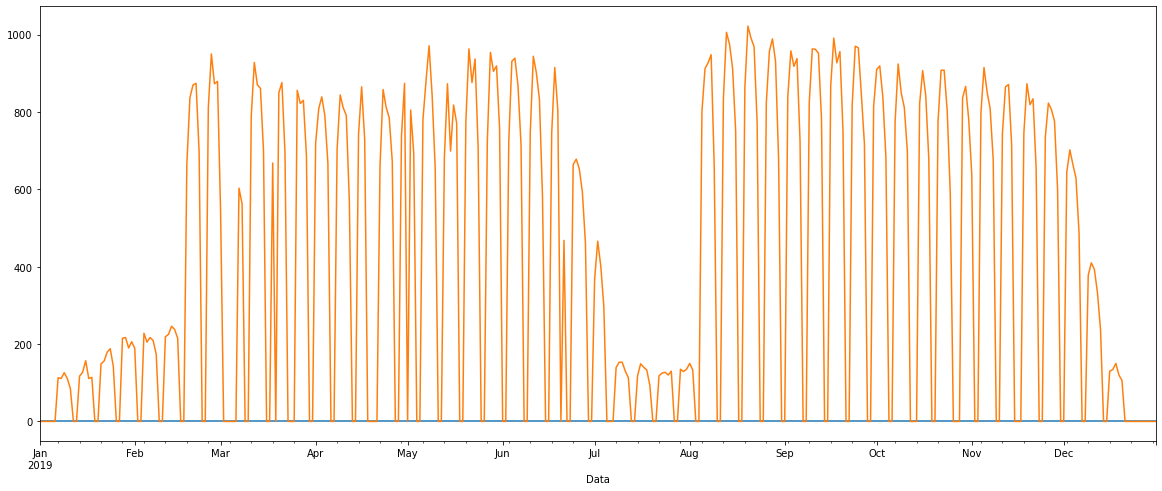

In [39]:
# Dados de test
plt.figure(figsize=(20, 8))
y_pred_RanFor_Time.plot();
ytest_time.plot();

## Random forest não prediz para valores fora do intervalo que foi treinado!

## Método Shift

In [40]:
df5['Lag_1_almoco'] = df['Qt_almoco'].shift(1)
df5['Lag_1_jantar'] = df['Qt_jantar'].shift(1)
df5.head()

,Qt_almoco,Qt_jantar,Time,Lag_1_almoco,Lag_1_jantar
Data,,,,,
2016-01-04,364.0,294.0,0,NaN,NaN
2016-01-05,489.0,363.0,1,364.0,294.0
2016-01-06,522.0,401.0,2,489.0,363.0
2016-01-07,514.0,349.0,3,522.0,401.0
2016-01-08,409.0,218.0,4,514.0,349.0


In [41]:
#df5.drop(columns='Lag_1', inplace=True)

### Regressão Linear

In [42]:
dfTreino = df5[:'2018-12-31']
dfTeste = df5['2019-01-01':'2019-12-31']

In [43]:
Xtrain = dfTreino.loc[:, ['Lag_1_almoco', 'Lag_1_jantar']]
Xtrain.dropna(inplace=True)  # drop missing values in the feature set
ytrain = dfTreino.loc[:, 'Qt_almoco']  # create the target
ytrain, Xtrain = ytrain.align(Xtrain, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(Xtrain, ytrain)

y_pred_Linear_reg_shift = pd.Series(model.predict(Xtrain), index=Xtrain.index)

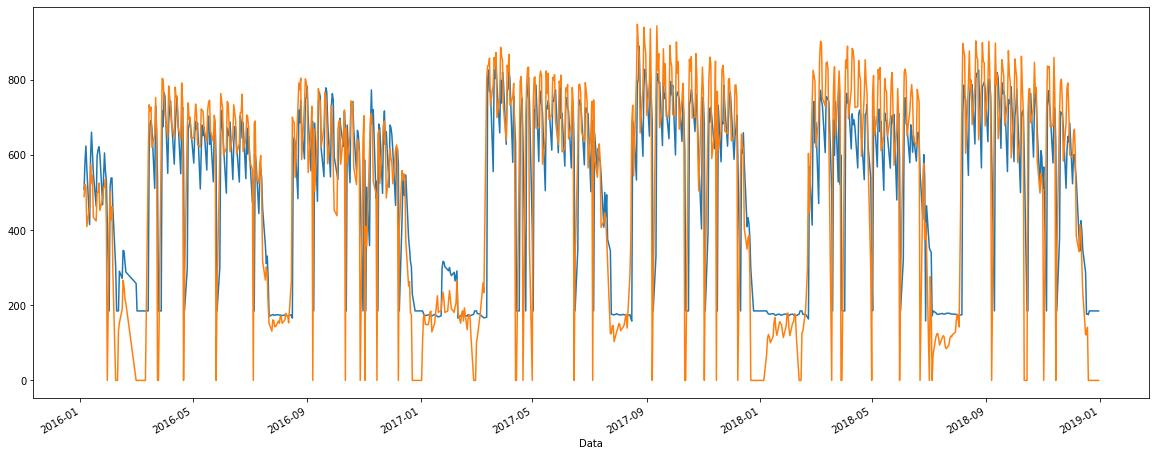

In [44]:
# Dados de treino
plt.figure(figsize=(20, 8))
y_pred_Linear_reg_shift.plot();
ytrain.plot();

In [45]:
# Test data
Xtest = dfTeste.loc[:, ['Lag_1_almoco', 'Lag_1_jantar']]  # features
ytest_shift = dfTeste.loc[:, 'Qt_almoco']  # target

Xtest.dropna(inplace=True)  # drop missing values in the feature set
ytest_shift = dfTeste.loc[:, 'Qt_almoco']  # create the target
ytest_shift, Xtest = ytest_shift.align(Xtest, join='inner')  # drop corresponding values in target

In [46]:
y_pred_Linear_reg_shift = pd.Series(model.predict(Xtest), index=Xtest.index)

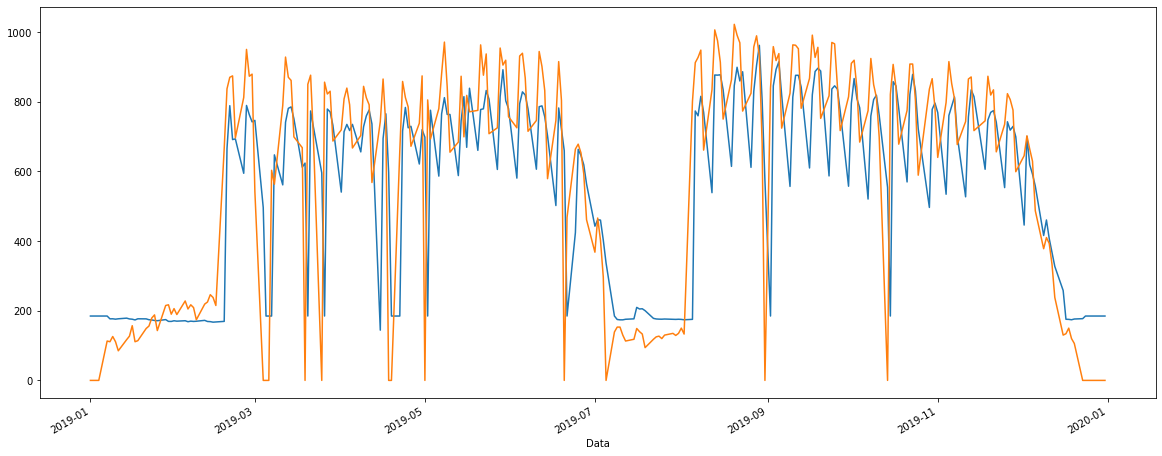

In [47]:
# Dados de test
plt.figure(figsize=(20, 8))
y_pred_Linear_reg_shift.plot();
ytest_shift.plot();

Vale notar que a regressão considera valores negativos. Sendo isso facilmente contornado

### Random Forest

In [48]:
model = RandomForestRegressor()
model.fit(Xtrain, ytrain)

y_pred_RanFor_Shift = pd.Series(model.predict(Xtrain), index=Xtrain.index)

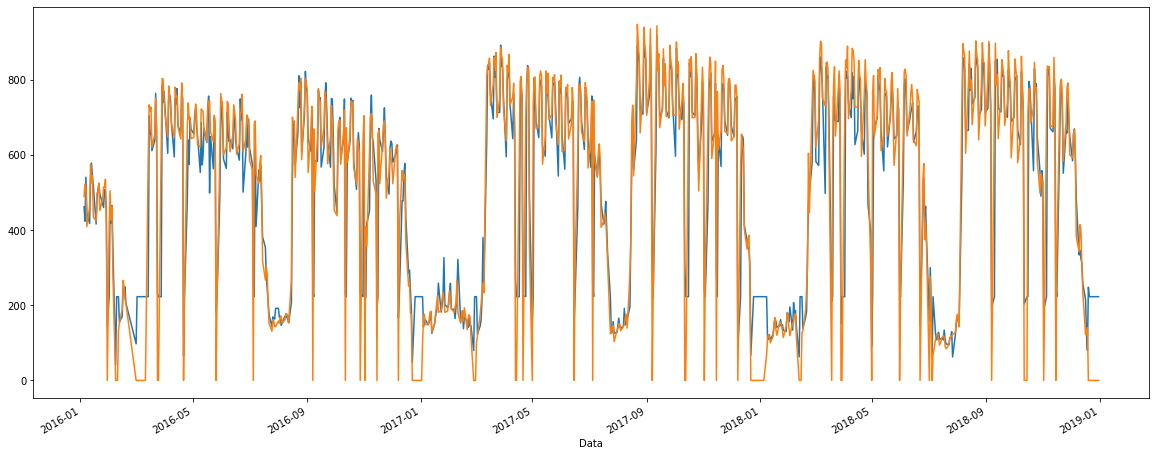

In [49]:
# Dados de treino
plt.figure(figsize=(20, 8))
y_pred_RanFor_Shift.plot();
ytrain.plot();

In [50]:
y_pred_RanFor_Shift = pd.Series(model.predict(Xtest), index=Xtest.index)

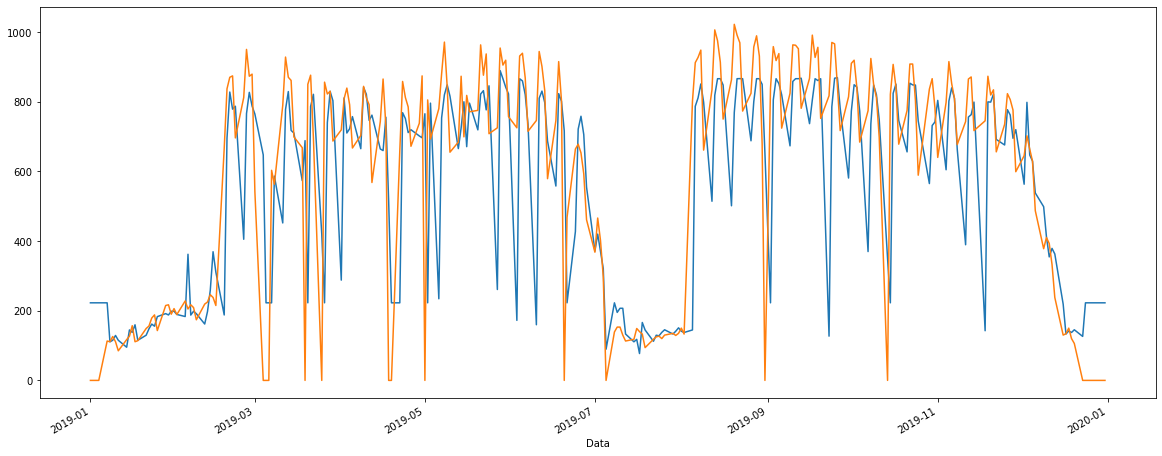

In [51]:
# Dados de test
plt.figure(figsize=(20, 8))
y_pred_RanFor_Shift.plot();
ytest_shift.plot();

## Método de criar recursos

In [52]:
df6 = df5.copy()

In [53]:
#df6['Date'] = df6[df6.index].dt.strftime('%d.%m.%Y')
df6['year'] = pd.DatetimeIndex(df6.index).year
df6['month'] = pd.DatetimeIndex(df6.index).month
df6['day'] = pd.DatetimeIndex(df6.index).day
df6['dayofyear'] = pd.DatetimeIndex(df6.index).dayofyear
df6['weekofyear'] = pd.DatetimeIndex(df6.index).weekofyear
df6['weekday'] = pd.DatetimeIndex(df6.index).weekday
df6['quarter'] = pd.DatetimeIndex(df6.index).quarter
df6['is_month_start'] = pd.DatetimeIndex(df6.index).is_month_start
df6['is_month_end'] = pd.DatetimeIndex(df6.index).is_month_end
print(df6.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1549 entries, 2016-01-04 to 2020-03-31
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Qt_almoco       1549 non-null   float64
 1   Qt_jantar       1549 non-null   float64
 2   Time            1549 non-null   int32  
 3   Lag_1_almoco    1096 non-null   float64
 4   Lag_1_jantar    1096 non-null   float64
 5   year            1549 non-null   int64  
 6   month           1549 non-null   int64  
 7   day             1549 non-null   int64  
 8   dayofyear       1549 non-null   int64  
 9   weekofyear      1549 non-null   int64  
 10  weekday         1549 non-null   int64  
 11  quarter         1549 non-null   int64  
 12  is_month_start  1549 non-null   bool   
 13  is_month_end    1549 non-null   bool   
dtypes: bool(2), float64(4), int32(1), int64(7)
memory usage: 186.6 KB
None


C:\Users\joaov\AppData\Local\Temp\ipykernel_16432\1808479070.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df6['weekofyear'] = pd.DatetimeIndex(df6.index).weekofyear


In [54]:
df6.head()

,Qt_almoco,Qt_jantar,Time,Lag_1_almoco,Lag_1_jantar,year,month,day,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end
Data,,,,,,,,,,,,,,
2016-01-04,364.0,294.0,0,NaN,NaN,2016,1,4,4,1,0,1,False,False
2016-01-05,489.0,363.0,1,364.0,294.0,2016,1,5,5,1,1,1,False,False
2016-01-06,522.0,401.0,2,489.0,363.0,2016,1,6,6,1,2,1,False,False
2016-01-07,514.0,349.0,3,522.0,401.0,2016,1,7,7,1,3,1,False,False
2016-01-08,409.0,218.0,4,514.0,349.0,2016,1,8,8,1,4,1,False,False


In [55]:
dfTreino = df6[:'2018-12-31']
dfTeste = df6['2019-01-01':'2019-12-31']

### Regressão Linear

In [56]:
Xtrain = dfTreino.loc[:, ['year', 'month', 'day', 'dayofyear', 'weekofyear', 'weekday', 'quarter', 'is_month_start', 'is_month_end']]
Xtrain.dropna(inplace=True)  # drop missing values in the feature set
ytrain = dfTreino.loc[:, 'Qt_almoco']  # create the target
ytrain, Xtrain = ytrain.align(Xtrain, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(Xtrain, ytrain)

y_pred_Linear_reg_create_features = pd.Series(model.predict(Xtrain), index=Xtrain.index)

In [57]:
# Test data
Xtest = dfTeste.loc[:, ['year', 'month', 'day', 'dayofyear', 'weekofyear', 'weekday', 'quarter', 'is_month_start', 'is_month_end']]  # features
ytestCR = dfTeste.loc[:, 'Qt_almoco']  # target

Xtest.dropna(inplace=True)  # drop missing values in the feature set
ytestCR = dfTeste.loc[:, 'Qt_almoco']  # create the target
ytestCR, Xtest = ytestCR.align(Xtest, join='inner')  # drop corresponding values in target

In [98]:
Xtrain

,year,month,day,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end
Data,,,,,,,,,
2016-01-04,2016,1,4,4,1,0,1,False,False
2016-01-05,2016,1,5,5,1,1,1,False,False
2016-01-06,2016,1,6,6,1,2,1,False,False
2016-01-07,2016,1,7,7,1,3,1,False,False
2016-01-08,2016,1,8,8,1,4,1,False,False
...,...,...,...,...,...,...,...,...,...
2018-12-27,2018,12,27,361,52,3,4,False,False
2018-12-28,2018,12,28,362,52,4,4,False,False
2018-12-29,2018,12,29,363,52,5,4,False,False


In [58]:
y_pred_Linear_reg_create_features = pd.Series(model.predict(Xtest), index=Xtest.index)

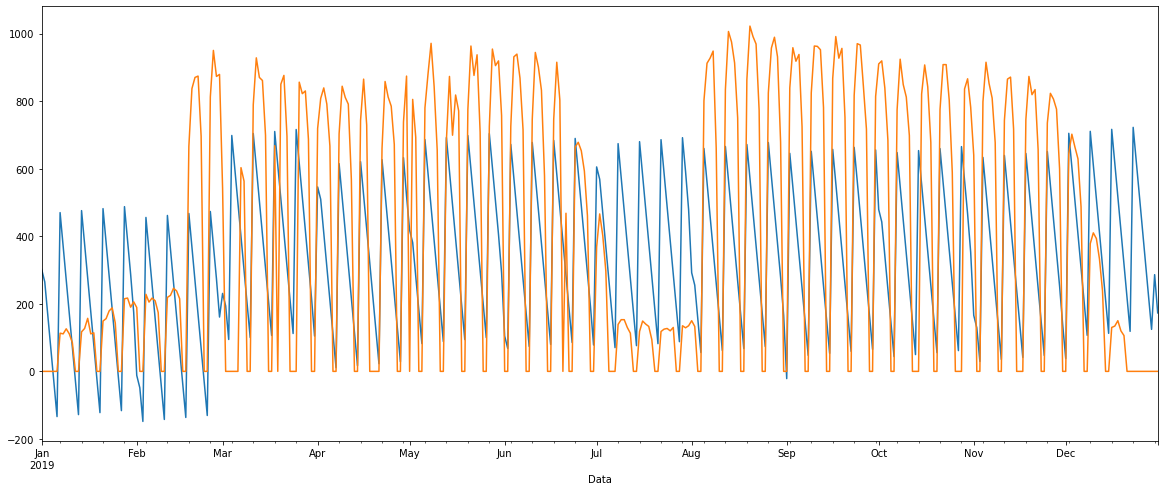

In [59]:
# Dados de test
plt.figure(figsize=(20, 8))
y_pred_Linear_reg_create_features.plot();
ytestCR.plot();

### Random Forest

In [60]:
model = RandomForestRegressor()
model.fit(Xtrain, ytrain)

y_pred_RanFor_create_featueres = pd.Series(model.predict(Xtrain), index=Xtrain.index)

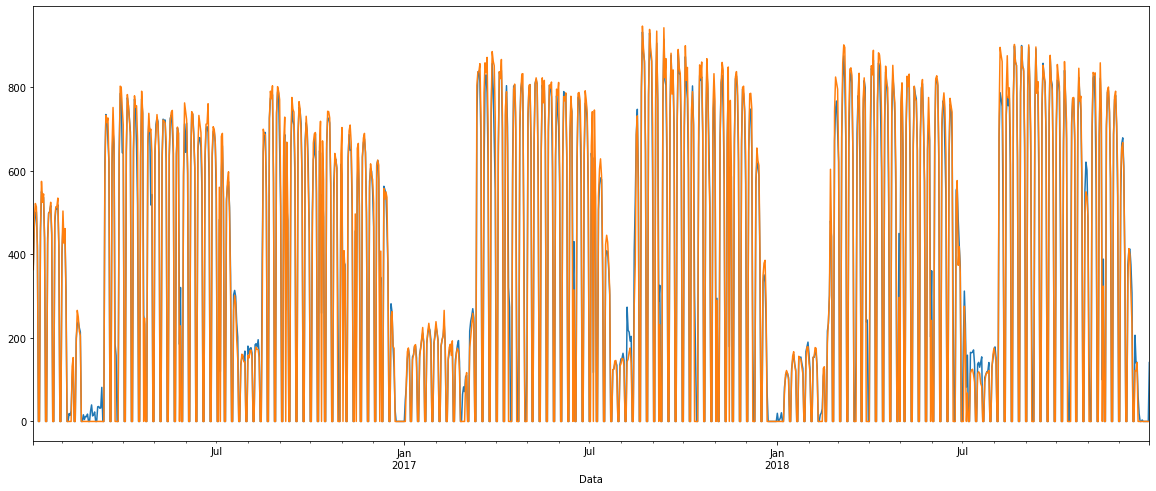

In [61]:
# Dados de treino
plt.figure(figsize=(20, 8))
y_pred_RanFor_create_featueres.plot();
ytrain.plot();

In [62]:
y_pred_RanFor_create_featueres = pd.Series(model.predict(Xtest), index=Xtest.index)

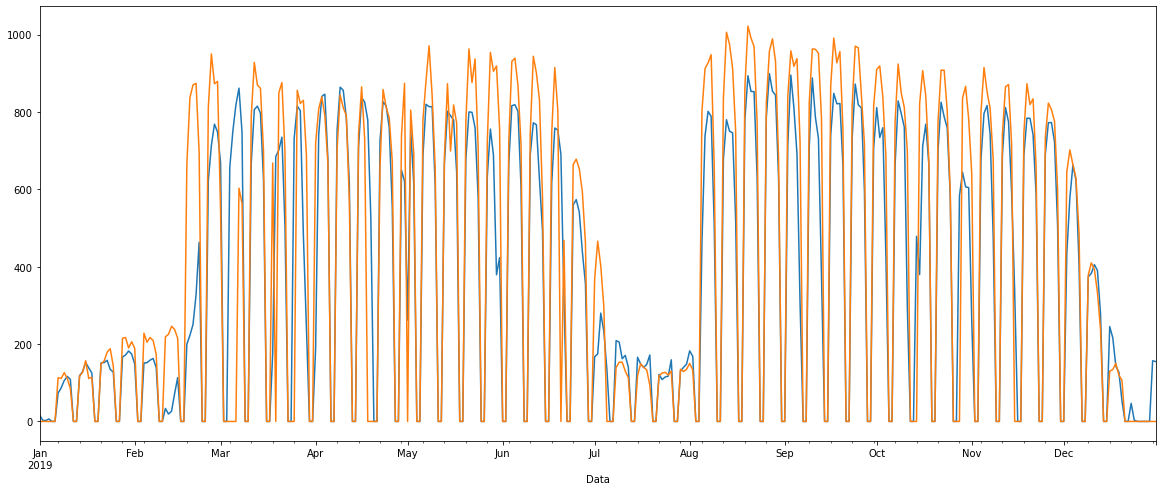

In [63]:
# Dados de test
plt.figure(figsize=(20, 8))
y_pred_RanFor_create_featueres.plot();
ytestCR.plot();

## Avaliação dos modelos - Erro quadrático Médio

In [65]:
# Método TIME

mean_squared_error(ytest_time, y_pred_RanFor_Time)

319735.96438356163

In [69]:
# Método SHIFT

print('Regressão Linear:',mean_squared_error(ytest_shift, y_pred_Linear_reg_shift))
print('Random Forest:',mean_squared_error(ytest_shift, y_pred_RanFor_Shift))

Regressão Linear: 38056.34961482473
Random Forest: 44197.012676179154


In [91]:
# Método Criando recursos

print('Regressão Linear:',mean_squared_error(ytestCR, y_pred_Linear_reg_create_features))
print('Random Forest:',mean_squared_error(ytestCR, y_pred_RanFor_create_featueres))

Regressão Linear: 102976.85803659321
Random Forest: 30440.101601917806


## Avaliação dos modelos - R score

In [92]:
# Método TIME

r2_score(ytest_time, y_pred_RanFor_Time)

-1.1441276622362246

In [94]:
# Método SHIFT

print('Regressão Linear:',r2_score(ytest_shift, y_pred_Linear_reg_shift))
print('Random Forest:',r2_score(ytest_shift, y_pred_RanFor_Shift))

Regressão Linear: 0.6620704992477595
Random Forest: 0.6075431674460023


In [96]:
# Método Criando recursos

print('Regressão Linear:',r2_score(ytestCR, y_pred_Linear_reg_create_features))
print('Random Forest:',r2_score(ytestCR, y_pred_RanFor_create_featueres))

Regressão Linear: 0.30944418369664073
Random Forest: 0.7958707460019823


## Otimizando as entradas do melhor modelo

In [100]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1093 entries, 2016-01-04 to 2018-12-31
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   year            1093 non-null   int64
 1   month           1093 non-null   int64
 2   day             1093 non-null   int64
 3   dayofyear       1093 non-null   int64
 4   weekofyear      1093 non-null   int64
 5   weekday         1093 non-null   int64
 6   quarter         1093 non-null   int64
 7   is_month_start  1093 non-null   bool 
 8   is_month_end    1093 non-null   bool 
dtypes: bool(2), int64(7)
memory usage: 70.4 KB


In [104]:
model.feature_names_in_

array(['year', 'month', 'day', 'dayofyear', 'weekofyear', 'weekday',
       'quarter', 'is_month_start', 'is_month_end'], dtype=object)

In [101]:
model.feature_importances_

array([0.05437424, 0.00908866, 0.068052  , 0.16462571, 0.18960053,
       0.49971268, 0.00944379, 0.00314621, 0.00195618])

In [158]:
# Função para retornar o ultimo dia do mês

def last_day_of_month(any_day):
    # The day 28 exists in every month. 4 days later, it's always next month
    next_month = any_day.replace(day=28) + timedelta(days=4)
    # subtracting the number of the current day brings us back one month
    return next_month - timedelta(days=next_month.day)

In [169]:
# Recebe um objeto date e retorna uma lista para ser utilzada no modelo
def date_to_model(data):
    year = data.year
    month = data.month
    day = data.day
    dayofyear = int(data.strftime("%j"))
    weekofyear = data.isocalendar().week
    weekday = data.weekday()
    quarter = pd.Timestamp(data).quarter
    is_month_start = (data ==  data.replace(day=1))
    is_month_end = (last_day_of_month(data) == data)
    return [year, month, day, dayofyear, weekofyear, weekday, quarter, is_month_start, is_month_end]

In [203]:
data = datetime.strptime('2019/01/18', '%Y/%m/%d')

In [204]:
model.predict([date_to_model(data)])

C:\Users\joaov\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([125.28])

In [205]:
ytestCR[data]

114.0

Serão 2 modelos, um para amolço e outro para janta.

In [197]:
# Treinando almoço
Xtrain = dfTreino.loc[:, ['year', 'month', 'day', 'dayofyear', 'weekofyear', 'weekday', 'quarter', 'is_month_start', 'is_month_end']]
Xtrain.dropna(inplace=True)  # drop missing values in the feature set
ytrain = dfTreino.loc[:, 'Qt_almoco']  # create the target
ytrain, Xtrain = ytrain.align(Xtrain, join='inner')  # drop corresponding values in target


model_almoco = RandomForestRegressor()
model_almoco.fit(Xtrain, ytrain)

RandomForestRegressor()

In [198]:
# Treinando jantar
Xtrain = dfTreino.loc[:, ['year', 'month', 'day', 'dayofyear', 'weekofyear', 'weekday', 'quarter', 'is_month_start', 'is_month_end']]
Xtrain.dropna(inplace=True)  # drop missing values in the feature set
ytrain = dfTreino.loc[:, 'Qt_jantar']  # create the target
ytrain, Xtrain = ytrain.align(Xtrain, join='inner')  # drop corresponding values in target


model_jantar = RandomForestRegressor()
model_jantar.fit(Xtrain, ytrain)

RandomForestRegressor()

### Modelo Final

In [200]:
def modelo(data, refeicao):
    if refeicao == 1:
        return model_almoco.predict(data)
    elif refeicao == 2:
        return model_jantar.predict(data)
    else:
        return 'Refeição Inválida'

# FIM